In [1]:
# 구글 드라이브 불러오기

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Statistics

### Normality Tests

#### Benchmark Case

In [2]:
import math
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
from pylab import mpl, plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [4]:
def gen_paths(S0, r, sigma, T, M, I):
    ''' 
    Generate Monte Carlo paths for geometric Brownian motion.
    Parameters
    ==========
    S0: float
    initial stock/index value
    r: float
    constant short rate
    sigma: float
    constant volatility
    T: float
    final time horizon
    M: int
    number of time steps/intervals
    I: int
    number of paths to be simulated
    Returns
    =======
    paths: ndarray, shape (M + 1, I)
    simulated paths given the parameters
    '''
    dt = T / M
    paths = np.zeros((M + 1, I))
    paths[0] = S0
    for t in range(1, M + 1):
        rand = np.random.standard_normal(I)
        rand = (rand - rand.mean()) / rand.std()
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
                                         sigma * math.sqrt(dt) * rand)
    return paths

In [5]:
S0 = 100.
r = 0.05
sigma = 0.2
T = 1.0
M = 50
I = 250000
np.random.seed(1000)

In [6]:
paths = gen_paths(S0, r, sigma, T, M, I)

In [7]:
S0 * math.exp(r*T)

105.12710963760242

In [8]:
paths[-1].mean()

105.12645392478755

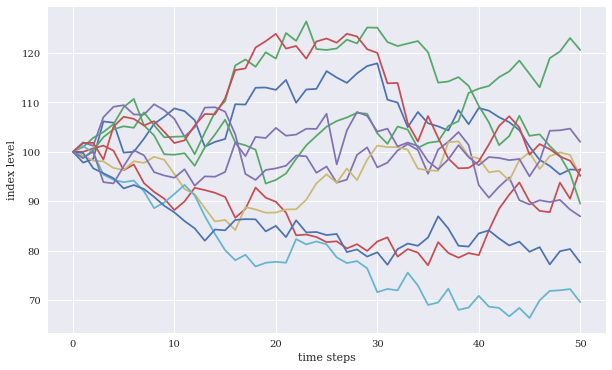

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(paths[:, :10])
plt.xlabel('time steps')
plt.ylabel('index level');

In [ ]:
paths[:, 0].round(4)

array([100.    ,  97.821 ,  98.5573, 106.1546, 105.899 ,  99.8363,
       100.0145, 102.6589, 105.6643, 107.1107, 108.7943, 108.2449,
       106.4105, 101.0575, 102.0197, 102.6052, 109.6419, 109.5725,
       112.9766, 113.0225, 112.5476, 114.5585, 109.942 , 112.6271,
       112.7502, 116.3453, 115.0443, 113.9586, 115.8831, 117.3705,
       117.9185, 110.5539, 109.9687, 104.9957, 108.0679, 105.7822,
       105.1585, 104.3304, 108.4387, 105.5963, 108.866 , 108.3284,
       107.0077, 106.0034, 104.3964, 101.0637,  98.3776,  97.135 ,
        95.4254,  96.4271,  96.3386])

In [ ]:
log_returns = np.log(paths[1:] / paths[:-1])

In [ ]:
log_returns[:, 0].round(4)

array([-0.022 ,  0.0075,  0.0743, -0.0024, -0.059 ,  0.0018,  0.0261,
        0.0289,  0.0136,  0.0156, -0.0051, -0.0171, -0.0516,  0.0095,
        0.0057,  0.0663, -0.0006,  0.0306,  0.0004, -0.0042,  0.0177,
       -0.0411,  0.0241,  0.0011,  0.0314, -0.0112, -0.0095,  0.0167,
        0.0128,  0.0047, -0.0645, -0.0053, -0.0463,  0.0288, -0.0214,
       -0.0059, -0.0079,  0.0386, -0.0266,  0.0305, -0.0049, -0.0123,
       -0.0094, -0.0153, -0.0324, -0.0269, -0.0127, -0.0178,  0.0104,
       -0.0009])

In [ ]:
def print_statistics(array):
    '''
    Prints selected statistics.
    Parameters
    ==========
    array: ndarray
    object to generate statistics on
    '''
    sta = scs.describe(array)
    print('%14s %15s' % ('statistic', 'value'))
    print(30 * '-')
    print('%14s %15.5f' % ('size', sta[0]))
    print('%14s %15.5f' % ('min', sta[1][0]))
    print('%14s %15.5f' % ('max', sta[1][1]))
    print('%14s %15.5f' % ('mean', sta[2]))
    print('%14s %15.5f' % ('std', np.sqrt(sta[3])))
    print('%14s %15.5f' % ('skew', sta[4]))
    print('%14s %15.5f' % ('kurtosis', sta[5]))

In [ ]:
print_statistics(log_returns.flatten())

     statistic           value
------------------------------
          size  12500000.00000
           min        -0.15664
           max         0.15371
          mean         0.00060
           std         0.02828
          skew         0.00055
      kurtosis         0.00085


In [ ]:
log_returns.mean() * M + 0.5 * sigma ** 2

0.05000000000000006

In [ ]:
log_returns.std() * math.sqrt(M)

0.20000000000000015

AttributeError: ignored

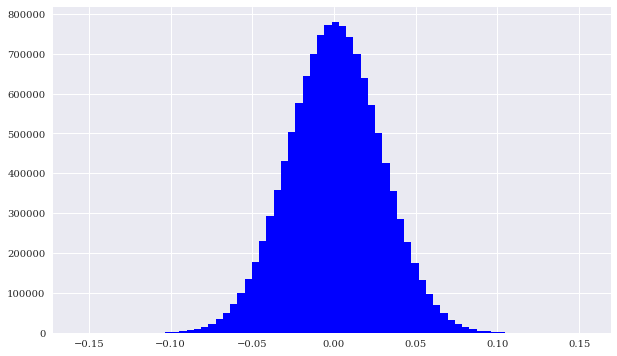

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(log_returns.flatten(), bins=70, normed=True, 
         label='frequency', color='b')
plt.xlabel('log return')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, loc=r / M, scale=sigma / np.sqrt(M)), 
         'r', lw=2.0, label='pdf')
plt.legend();

In [ ]:
sm.qqplot(log_returns.flatten()[::500], line='s')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles');

In [ ]:
def normality_tests(arr):
    ''' 
    Tests for normality distribution of given data set.
    Parameters
    ==========
    array: ndarray
    object to generate statistics on
    '''
    print('Skew of data set %14.3f' % scs.skew(arr))
    print('Skew test p-value %14.3f' % scs.skewtest(arr)[1])
    print('Kurt of data set %14.3f' % scs.kurtosis(arr))
    print('Kurt test p-value %14.3f' % scs.kurtosistest(arr)[1])
    print('Norm test p-value %14.3f' % scs.normaltest(arr)[1])

In [ ]:
normality_tests(log_returns.flatten())

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
ax1.hist(paths[-1], bins=30)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax1.set_title('regular data')
ax2.hist(np.log(paths[-1]), bins=30)
ax2.set_xlabel('log index level')
ax2.set_title('log data')

In [ ]:
print_statistics(paths[-1])

In [ ]:
print_statistics(np.log(paths[-1]))

In [ ]:
normality_tests(np.log(paths[-1]))

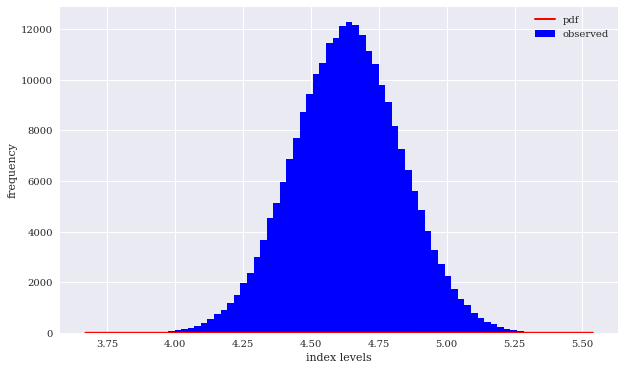

In [ ]:
plt.figure(figsize=(10, 6))
log_data = np.log(paths[-1])
plt.hist(log_data, bins=70,  
         label='observed', color='b')
plt.xlabel('index levels')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, log_data.mean(), log_data.std()), 
         'r', lw=2.0, label='pdf')
plt.legend();

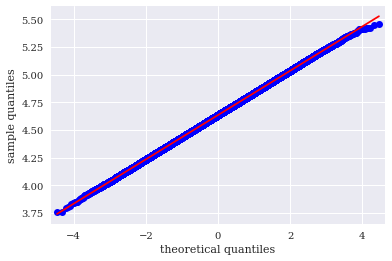

In [ ]:
sm.qqplot(log_data, line='s')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles');

#### Real-World Data

In [ ]:
import pandas as pd

In [ ]:
raw = pd.read_csv('/content/drive/My Drive/Python_for_Finance/data/tr_eikon_eod_data.csv', index_col=0, parse_dates=True).dropna()

In [ ]:
symbols = ['SPY', 'GLD', 'AAPL.O', 'MSFT.O']

In [ ]:
data = raw[symbols]
data = data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2010-01-04 to 2017-10-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     1972 non-null   float64
 1   GLD     1972 non-null   float64
 2   AAPL.O  1972 non-null   float64
 3   MSFT.O  1972 non-null   float64
dtypes: float64(4)
memory usage: 77.0 KB


In [ ]:
data.head()

,SPY,GLD,AAPL.O,MSFT.O
Date,,,,
2010-01-04,113.33,109.80,30.572827,30.950
2010-01-05,113.63,109.70,30.625684,30.960
2010-01-06,113.71,111.51,30.138541,30.770
2010-01-07,114.19,110.82,30.082827,30.452
2010-01-08,114.57,111.37,30.282827,30.660


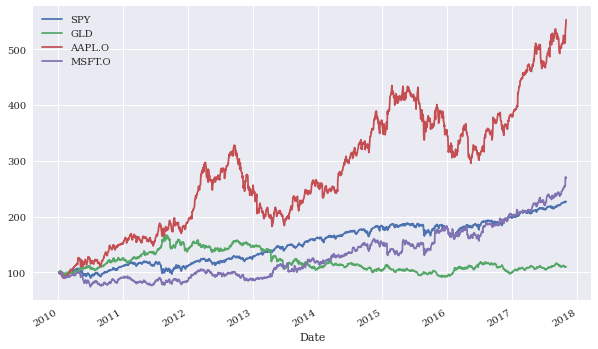

In [ ]:
(data / data.iloc[0] * 100).plot(figsize=(10, 6))

In [ ]:
log_returns = np.log(data / data.shift(1))
log_returns.head()

,SPY,GLD,AAPL.O,MSFT.O
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.002644,-0.000911,0.001727,0.000323
2010-01-06,0.000704,0.016365,-0.016034,-0.006156
2010-01-07,0.004212,-0.006207,-0.001850,-0.010389
2010-01-08,0.003322,0.004951,0.006626,0.006807


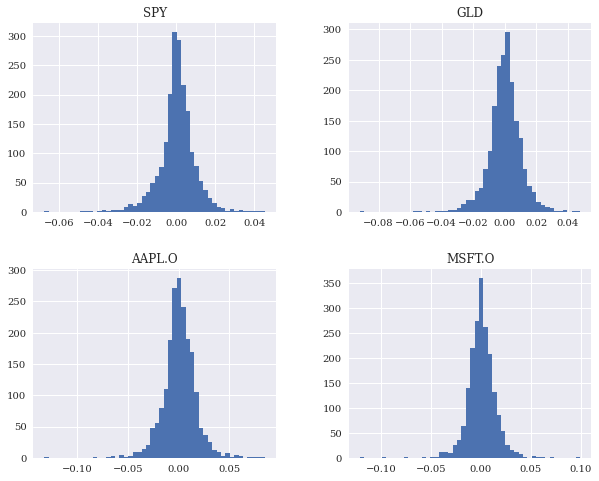

In [ ]:
log_returns.hist(bins=50, figsize=(10, 8));

In [ ]:
for sym in symbols:
    print('\nResults for symbol {}'.format(sym))
    print(30 * '-')
    log_data = np.array(log_returns[sym].dropna())
    print_statistics(log_data)


Results for symbol SPY
------------------------------
     statistic           value
------------------------------
          size      1971.00000
           min        -0.06734
           max         0.04545
          mean         0.00042
           std         0.00934
          skew        -0.46886
      kurtosis         4.54265

Results for symbol GLD
------------------------------
     statistic           value
------------------------------
          size      1971.00000
           min        -0.09191
           max         0.04795
          mean         0.00005
           std         0.01048
          skew        -0.60078
      kurtosis         5.42113

Results for symbol AAPL.O
------------------------------
     statistic           value
------------------------------
          size      1971.00000
           min        -0.13187
           max         0.08502
          mean         0.00087
           std         0.01605
          skew        -0.26179
      kurtosis         4.9

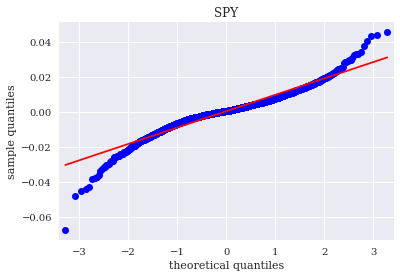

In [ ]:
sm.qqplot(log_returns['SPY'].dropna(), line='s')
plt.title('SPY')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles');

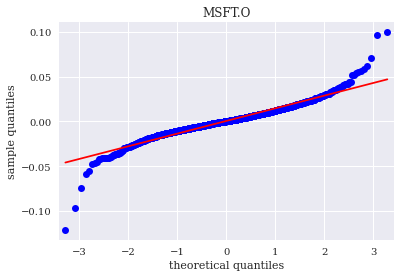

In [ ]:
sm.qqplot(log_returns['MSFT.O'].dropna(), line='s')
plt.title('MSFT.O')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles');

In [ ]:
for sym in symbols:
    print('\nResults for symbol {}'.format(sym))
    print(32 * '-')
    log_data = np.array(log_returns[sym].dropna())
    normality_tests(log_data)


Results for symbol SPY
--------------------------------


NameError: ignored

### Portfolio Optimization

#### The Data

In [ ]:
symbols = ['AAPL.O', 'MSFT.O', 'SPY', 'GLD']

In [ ]:
noa = len(symbols)

In [ ]:
data = raw[symbols]

In [ ]:
rets = np.log(data/data.shift(1))

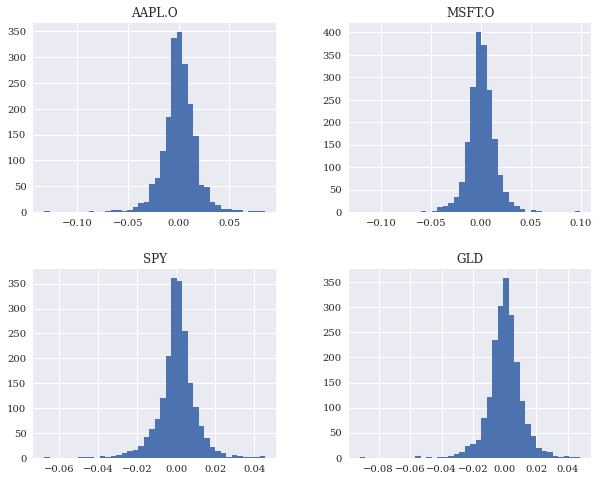

In [ ]:
rets.hist(bins=40, figsize=(10, 8));

In [ ]:
rets.mean() * 252

AAPL.O    0.218633
MSFT.O    0.126401
SPY       0.104758
GLD       0.012069
dtype: float64

In [ ]:
rets.cov() * 252

,AAPL.O,MSFT.O,SPY,GLD
AAPL.O,0.064899,0.022504,0.020903,0.001510
MSFT.O,0.022504,0.050234,0.021608,-0.000426
SPY,0.020903,0.021608,0.021986,0.000002
GLD,0.001510,-0.000426,0.000002,0.027666


#### The Basic Theory

In [ ]:
weights = np.random.random(noa)
weights /= np.sum(weights)

In [ ]:
weights

array([0.07650728, 0.06021919, 0.63364218, 0.22963135])

In [ ]:
weights.sum()

1.0

In [ ]:
np.sum(rets.mean()*weights)*252

0.09348922407789448

In [ ]:
np.dot(weights.T, np.dot(rets.cov() * 252, weights))

0.014773304718960347

In [ ]:
math.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

0.12154548415700332

In [ ]:
def port_ret(weights):
    return np.sum(rets.mean() * weights) * 252

In [ ]:
def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov()*252, weights)))

In [ ]:
prets = []
pvols = []
for p in range (2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(port_ret(weights))
    pvols.append(port_vol(weights))
prets = np.array(prets)
pvols = np.array(pvols)

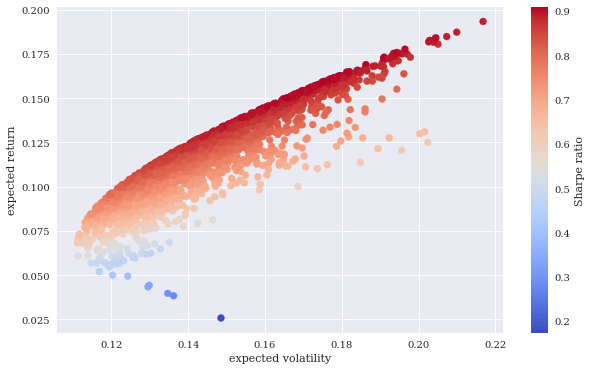

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols, 
            marker='o', cmap='coolwarm')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio');

#### Optimal Portfolios

In [ ]:
import scipy.optimize as sco

In [ ]:
def min_func_sharpe(weights):
    return -port_ret(weights) / port_vol(weights)

In [ ]:
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

In [ ]:
bnds = tuple((0, 1) for x in range(noa))

In [ ]:
eweights = np.array(noa * [1. / noa,])
eweights

array([0.25, 0.25, 0.25, 0.25])

In [ ]:
min_func_sharpe(eweights)

-0.8475033056372997

In [ ]:
%%time
opts = sco.minimize(min_func_sharpe, eweights, 
                    method='SLSQP', bounds=bnds,
                    constraints=cons)

CPU times: user 94.9 ms, sys: 577 µs, total: 95.4 ms
Wall time: 101 ms


In [ ]:
opts

     fun: -0.9099024148526451
     jac: array([ 1.13122165e-04, -3.17797065e-04, -9.85115767e-05,  2.31713057e-04])
 message: 'Optimization terminated successfully.'
    nfev: 48
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([0.50047651, 0.12199605, 0.31895613, 0.05857131])

In [ ]:
opts['x'].round(3)

array([0.5  , 0.122, 0.319, 0.059])

In [ ]:
port_ret(opts['x']).round(3)

0.159

In [ ]:
port_vol(opts['x']).round(3)

0.175

In [ ]:
port_ret(opts['x']) / port_vol(opts['x'])

0.9099024148526451

In [ ]:
optv = sco.minimize(port_vol, eweights, 
                    method='SLSQP', bounds=bnds,
                    constraints=cons)

In [ ]:
optv

     fun: 0.11066224869657879
     jac: array([0.11160342, 0.11085507, 0.11078553, 0.11050452])
 message: 'Optimization terminated successfully.'
    nfev: 48
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([1.73472348e-18, 1.40600031e-02, 5.43753872e-01, 4.42186125e-01])

In [ ]:
optv['x'].round(3)

array([0.   , 0.014, 0.544, 0.442])

In [ ]:
port_vol(optv['x']).round(3)

0.111

In [ ]:
port_ret(optv['x']).round(3)

0.064

In [ ]:
port_ret(optv['x']) / port_vol(optv['x'])

0.5790278349832955

#### Efficient Frontier

In [ ]:
cons = ({'type': 'eq', 'fun': lambda x: port_ret(x) - tret}, 
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

In [ ]:
bnds = tuple((0, 1) for x in weights)

In [ ]:
%%time
trets = np.linspace(0.05, 0.2, 50)
tvols = []
for tret in trets:
    res = sco.minimize(port_vol, eweights, method='SLSQP',
                       bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

CPU times: user 2.48 s, sys: 1.43 ms, total: 2.48 s
Wall time: 2.49 s


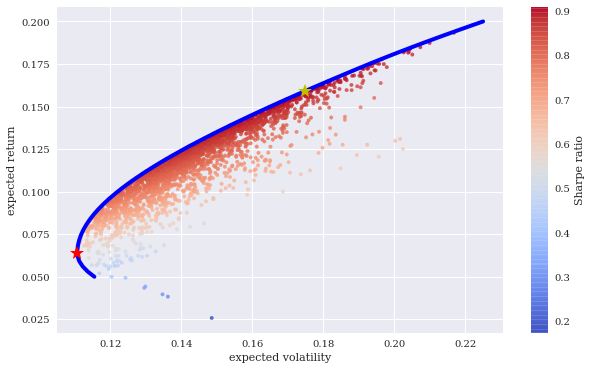

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols, 
            marker='.', alpha=0.8, cmap='coolwarm')
plt.plot(tvols, trets, 'b', lw=4.0)
plt.plot(port_vol(opts['x']), port_ret(opts['x']), 
         'y*', markersize=15.0)
plt.plot(port_vol(optv['x']), port_ret(optv['x']), 
         'r*', markersize=15.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

#### Capital Market Line

In [ ]:
import scipy.interpolate as sci

In [ ]:
ind = np.argmin(tvols)
evols = tvols[ind:]
erets = trets[ind:]

In [ ]:
tck = sci.splrep(evols, erets)

In [ ]:
def f(x):
    ''' Efficient frontier function (splines approximation). '''
    return sci.splev(x, tck, der=0)
def df(x):
    ''' First derivative of efficient frontier function. '''
    return sci.splev(x, tck, der=1)

In [ ]:
def equations(p, rf=0.01):
    eq1 = rf - p[0]
    eq2 = rf + p[1] * p[2] - f(p[2])
    eq3 = p[1] - df(p[2])
    return eq1, eq2, eq3

In [ ]:
opt = sco.fsolve(equations, [0.01, 0.5, 0.15])

In [ ]:
opt

array([0.01      , 0.85547098, 0.1924466 ])

In [ ]:
np.round(equations(opt), 6)

array([ 0.,  0., -0.])

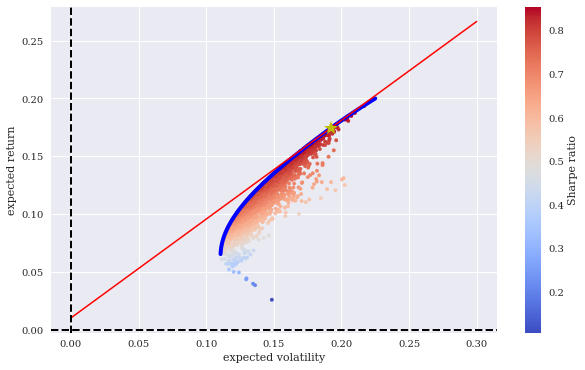

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=(prets - 0.01) / pvols, 
            marker='.', cmap='coolwarm')
plt.plot(evols, erets, 'b', lw=4.0)
cx = np.linspace(0.0, 0.3)
plt.plot(cx, opt[0] + opt[1] * cx, 'r', lw=1.5)
plt.plot(opt[2], f(opt[2]), 'y*', markersize=15.0)
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [ ]:
cons = ({'type': 'eq', 'fun': lambda x: port_ret(x) - f(opt[2])}, 
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
res = sco.minimize(port_vol, eweights, method='SLSQP', 
                   bounds=bnds, constraints=cons)

In [ ]:
res['x'].round(4)

array([0.5871, 0.1392, 0.2736, 0.    ])

In [ ]:
port_ret(res['x'])

0.17463247888154101

In [ ]:
port_vol(res['x'])

0.19244550012162273

In [ ]:
port_ret(res['x']) / port_vol(res['x'])

0.9074386190956705

### Bayesian Statistics

#### Bayesian Regression

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt

In [ ]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
np.random.seed(1000)
%matplotlib inline

In [ ]:
x = np.linspace(0, 10, 500)
y = 4 + 2 * x + np.random.standard_normal(len(x)) * 2

In [ ]:
reg = np.polyfit(x, y, 1)

In [ ]:
reg

array([2.03384161, 3.77649234])

Text(0, 0.5, 'y')

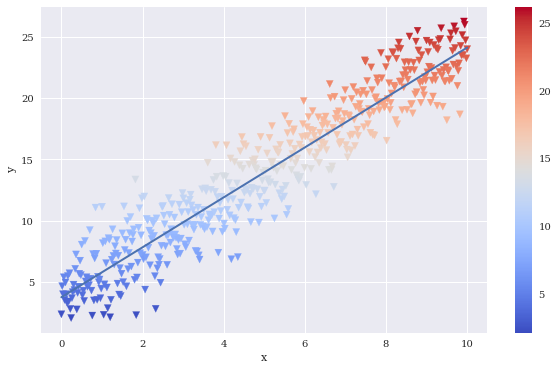

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=y, marker='v', cmap='coolwarm')
plt.plot(x, reg[1] + reg[0] * x, lw=2.0)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
!pip install pymc3
!pip install ArviZ
import pymc3 as pm

     |████████████████████████████████| 1.5MB 5.8MB/s 
     |████████████████████████████████| 737kB 20.1MB/s 
     |████████████████████████████████| 4.7MB 40.9MB/s 
     |████████████████████████████████| 296kB 46.1MB/s 
  Found existing installation: xarray 0.15.1
    Uninstalling xarray-0.15.1:
      Successfully uninstalled xarray-0.15.1


In [ ]:
%%time
with pm.Model() as model:
    # model
    alpha = pm.Normal('alpha', mu=0, sd=20)
    beta = pm.Normal('beta', mu=0, sd=10)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    y_est = alpha + beta * x
    likelihood = pm.Normal('y', mu=y_est, sd=sigma, observed=y)

    # inference
    start = pm.find_MAP()
    step = pm.NUTS()
    trace = pm.sample(2000, tune=1000, init=None, step=step, cores=2)

/usr/local/lib/python3.6/dist-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -1,067.8, ||grad|| = 60.354: 100%|██████████| 28/28 [00:00<00:00, 1152.32it/s]  
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta, alpha]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:08<00:00, 741.66draws/s]

CPU times: user 5.51 s, sys: 1.12 s, total: 6.62 s
Wall time: 1min 14s


In [ ]:
pip install --upgrade pymc3

     |████████████████████████████████| 1.9MB 4.3MB/s 
     |████████████████████████████████| 2.8MB 40.5MB/s 
     |████████████████████████████████| 102kB 10.1MB/s 
  Created wheel for theano-pymc: filename=Theano_PyMC-1.0.11-cp36-none-any.whl size=2572023 sha256=8e47bd963a0063b3f639ebfc3e480510de081a74300da54cd126d18f42bbb126
  Stored in directory: /root/.cache/pip/wheels/26/b2/77/4ee2bb9b1c1de7de771254a5e379d898273d8114237b0df686
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7667 sha256=0e9ec704bde8b7cafbb622da7fb9674e5e7172e856e39ed675c13169537186fa
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built theano-pymc contextvars
  Found existing installation: pymc3 3.7
    Uninstalling pymc3-3.7:
      Successfully uninstalled pymc3-3.7


In [ ]:
trace[0]

{'alpha': 3.9093372200357206,
 'beta': 2.0181109933613968,
 'sigma': 2.047590315504088,
 'sigma_interval__': -1.3568113417986785}

In [ ]:
pm.traceplot(trace, lines={'alpha': 4, 'beta': 2, 'sigma': 2});

/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


AttributeError: ignored

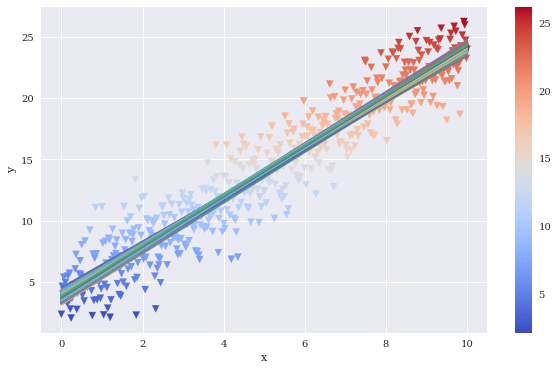

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=y, marker='v', cmap='coolwarm')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
for i in range(len(trace)):
    plt.plot(x, trace['alpha'][i] + trace['beta'][i] * x)

#### Two Financial Instruments

In [ ]:
raw = pd.read_csv('/content/drive/My Drive/Python_for_Finance/data/tr_eikon_eod_data.csv', index_col=0, parse_dates=True)

In [ ]:
data = raw[['GDX', 'GLD']].dropna()

In [ ]:
data = data / data.iloc[0]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2010-01-04 to 2017-10-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GDX     1972 non-null   float64
 1   GLD     1972 non-null   float64
dtypes: float64(2)
memory usage: 46.2 KB


In [ ]:
data.iloc[-1] / data.iloc[0] - 1

GDX   -0.528820
GLD    0.098998
dtype: float64

In [ ]:
data.corr()

,GDX,GLD
GDX,1.000000,0.715185
GLD,0.715185,1.000000


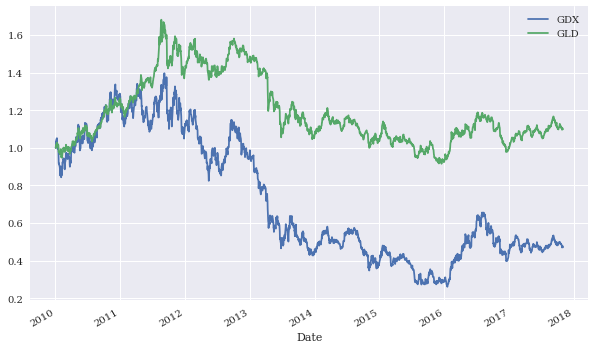

In [ ]:
data.plot(figsize=(10, 6));

In [ ]:
data.index[:3]

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06'], dtype='datetime64[ns]', name='Date', freq=None)

In [ ]:
mpl_dates = mpl.dates.date2num(data.index.to_pydatetime())
mpl_dates[:3]

array([733776., 733777., 733778.])

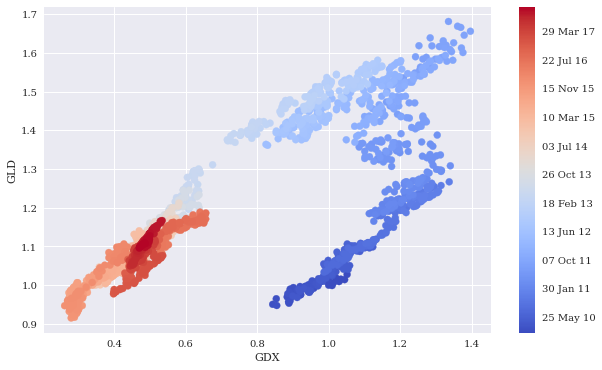

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['GDX'], data['GLD'], c=mpl_dates, 
            marker='o', cmap='coolwarm')
plt.xlabel('GDX')
plt.ylabel('GLD')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250), 
             format=mpl.dates.DateFormatter('%d %b %y'));

In [ ]:
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sd=20)
    beta = pm.Normal('beta', mu=0, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    y_est = alpha + beta * data['GDX'].values
    likelihood = pm.Normal('GLD', mu=y_est, sd=sigma,
                           observed=data['GLD'].values)
    start = pm.find_MAP()
    step = pm.NUTS()
    trace = pm.sample(250, tune=2000, start=start,
                      progressbar=True)

/usr/local/lib/python3.6/dist-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = 1,263.8, ||grad|| = 1,523.8: 100%|██████████| 29/29 [00:00<00:00, 1176.01it/s]  
Only 250 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, beta, alpha]
100%|██████████| 2250/2250 [00:04<00:00, 527.10it/s]


In [ ]:
pm.summary(trace)

TypeError: ignored

In [ ]:
fig = pm.traceplot(trace)

/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


AttributeError: ignored

#### Updating Estimates over Time

In [ ]:
from pymc3.distributions.timeseries import GaussianRandomWalk

In [ ]:
subsample_alpha = 50
subsample_beta = 50

In [ ]:
model_randomwalk = pm.Model()
with model_randomwalk:
    sigma_alpha = pm.Exponential('sig_alpha', 1. / .02, testval=.1)
    sigma_beta = pm.Exponential('sig_beta', 1. / .02, testval=.1)
    alpha = GaussianRandomWalk('alpha', sigma_alpha ** -2,
                               shape=int(len(data) / subsample_alpha))
    beta = GaussianRandomWalk('beta', sigma_beta ** -2,
                              shape=int(len(data) / subsample_beta))
    alpha_r = np.repeat(alpha, subsample_alpha)
    beta_r = np.repeat(beta, subsample_beta)
    regression = alpha_r + beta_r * data['GDX'].values[:2100]
    sd = pm.Uniform('sd', 0, 20)
    likelihood = pm.Normal('GLD', mu=regression, sd=sd,
                           observed=data['GLD'].values[:2100])

ValueError: ignored

In [ ]:
%%time
import scipy.optimize as sco
with model_randomwalk:
    start = pm.find_MAP(vars=[alpha, beta],
                        fmin=sco.fmin_l_bfgs_b)
    step = pm.NUTS(scaling=start)
    trace_rw = pm.sample(250, tune=1000, start=start,
                         progressbar=True)

/usr/local/lib/python3.6/dist-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  
/usr/local/lib/python3.6/dist-packages/pymc3/tuning/starting.py:102: UserWarning: In future versions, set the optimization algorithm with a string. For example, use `method="L-BFGS-B"` instead of `fmin=sp.optimize.fmin_l_bfgs_b"`.
  if vars is None:
logp = 102.98:   0%|          | 1/5000 [00:00<01:52, 44.33it/s]


ModuleNotFoundError: ignored

In [ ]:
pm.summary(trace_rw).head()

In [ ]:
sh = np.shape(trace_rw['alpha'])
sh

NameError: ignored

In [ ]:
part_dates = np.linspace(min(mpl_dates), max(mpl_dates), sh[1])

NameError: ignored

In [ ]:
index = [dt.datetime.fromordinal(int(date)) for date in part_dates]

NameError: ignored

In [ ]:
alpha = {'alpha_%i' % i: v for i, v in enumerate(trace_rw['alpha']) if i < 20}

NameError: ignored

In [ ]:
beta = {'beta_%i' % i: v for i, v in enumerate(trace_rw['beta']) if i < 20}

NameError: ignored

In [ ]:
df_alpha = pd.DataFrame(alpha, index=index)

NameError: ignored

In [ ]:
df_beta = pd.DataFrame(beta, index=index)

NameError: ignored

In [ ]:
ax = df_alpha.plot(color='b', style='-.', legend=False, 
                   lw=0.7, figsize=(10, 6))
df_beta.plot(color='r', style='-.', legend=False, lw=0.7, ax=ax)
plt.ylabel('alpha/beta');

NameError: ignored

NameError: ignored

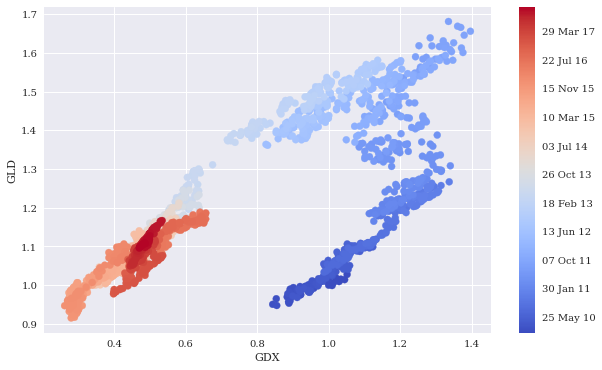

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['GDX'], data['GLD'], c=mpl_dates, 
            marker='o', cmap='coolwarm')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250), 
             format=mpl.dates.DateFormatter('%d %b %y'))
plt.xlabel('GDX')
plt.ylabel('GLD')
x = np.linspace(min(data['GDX']), max(data['GDX']))
for i in range(sh[1]):
    alpha_rw = np.mean(trace_rw['alpha'].T[i])
    beta_rw = np.mean(trace_rw['beta'].T[i])
    plt.plot(x, alpha_rw + beta_rw * x, '--', lw=0.7,
             color=plt.cm.coolwarm(i / sh[1]))

### Machine Learning

#### Unsupervised Learning

##### The data

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt

In [ ]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
np.random.seed(1000)
np.set_printoptions(suppress=True, precision=4)
%matplotlib inline

In [ ]:
from sklearn.datasets.samples_generator import make_blobs

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
X, y = make_blobs(n_samples=250, centers=4, random_state=500, cluster_std=1.25)

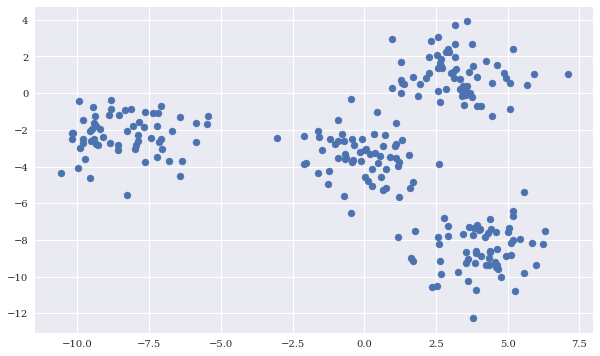

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=50);

##### k-means clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model = KMeans(n_clusters=4, random_state=0)

In [ ]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
y_kmeans = model.predict(X)

In [ ]:
y_kmeans[:12]

array([2, 2, 0, 3, 0, 2, 3, 3, 3, 0, 1, 1], dtype=int32)

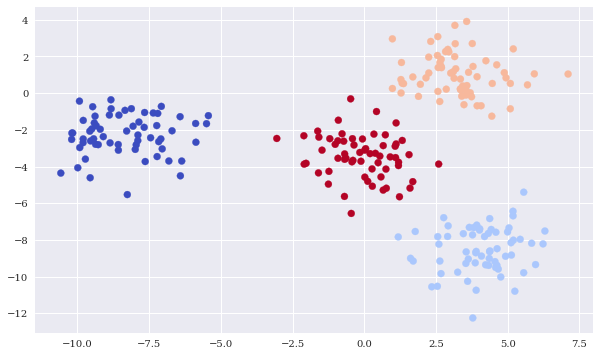

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='coolwarm');

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
model = GaussianMixture(n_components=4, random_state=0)

In [ ]:
model.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [ ]:
y_gm = model.predict(X)

In [ ]:
y_gm[:12]

array([2, 2, 0, 3, 0, 2, 3, 3, 3, 0, 1, 1])

In [ ]:
(y_gm == y_kmeans).all()

True

#### Supervised Learning

##### The data

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
n_samples = 100

In [ ]:
X, y = make_classification(n_samples=n_samples, n_features=2,
                           n_informative=2, n_redundant=0,
                           n_repeated=0, random_state=250)

In [ ]:
X[:5]

array([[ 1.6876, -0.7976],
       [-0.4312, -0.7606],
       [-1.4393, -1.2363],
       [ 1.118 , -1.8682],
       [ 0.0502,  0.659 ]])

In [ ]:
X.shape

(100, 2)

In [ ]:
y[:5]

array([1, 0, 0, 1, 1])

In [ ]:
y.shape

(100,)

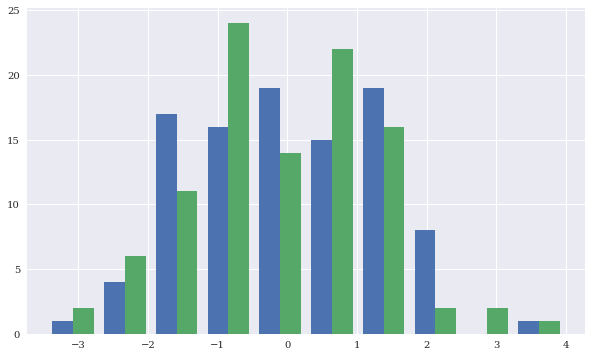

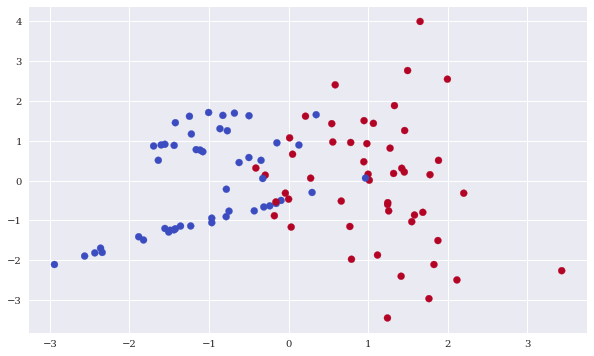

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(X);
plt.figure(figsize=(10, 6))
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap='coolwarm');

##### Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [ ]:
model = GaussianNB()

In [ ]:
model.fit(X, y)

NameError: ignored

In [ ]:
model.predict_proba(X).round(4)[:5]

array([[0.0041, 0.9959],
       [0.8534, 0.1466],
       [0.9947, 0.0053],
       [0.0182, 0.9818],
       [0.5156, 0.4844]])

In [ ]:
pred = model.predict(X)

In [ ]:
pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
pred == y

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True])

In [ ]:
accuracy_score(y, pred)

0.87

In [ ]:
Xc = X[y == pred]
Xf = X[y != pred]

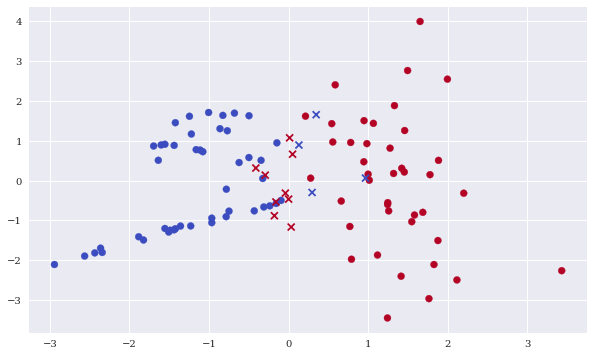

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x=Xc[:, 0], y=Xc[:, 1], c=y[y == pred],
marker='o', cmap='coolwarm')
plt.scatter(x=Xf[:, 0], y=Xf[:, 1], c=y[y != pred],
marker='x', cmap='coolwarm')

##### Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(C=1, solver='lbfgs')

In [ ]:
model.fit(X, y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.predict_proba(X).round(4)[:5]

array([[0.011 , 0.989 ],
       [0.7266, 0.2734],
       [0.971 , 0.029 ],
       [0.04  , 0.96  ],
       [0.4843, 0.5157]])

In [ ]:
pred = model.predict(X)

In [ ]:
accuracy_score(y, pred)

0.9

In [ ]:
Xc = X[y == pred]
Xf = X[y != pred]

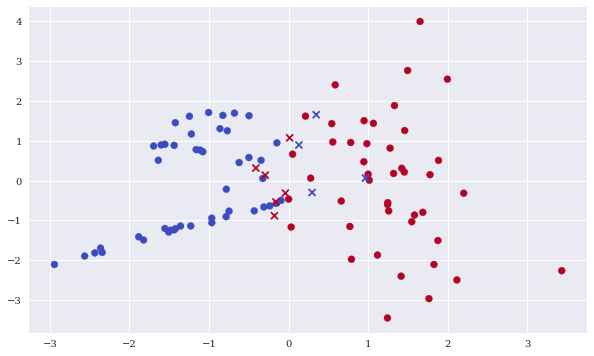

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x=Xc[:, 0], y=Xc[:, 1], c=y[y == pred], marker='o', cmap='coolwarm')
plt.scatter(x=Xf[:, 0], y=Xf[:, 1], c=y[y != pred], marker='x', cmap='coolwarm');

##### Decision trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(max_depth=1)

In [ ]:
model.fit(X, y)

NameError: ignored

In [ ]:
model.predict_proba(X).round(4)[:5]

array([[0.08, 0.92],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.08, 0.92],
       [0.08, 0.92]])

In [ ]:
pred = model.predict(X)

In [ ]:
accuracy_score(y, pred)

0.92

In [ ]:
Xc = X[y == pred]
Xf = X[y != pred]

NameError: ignored

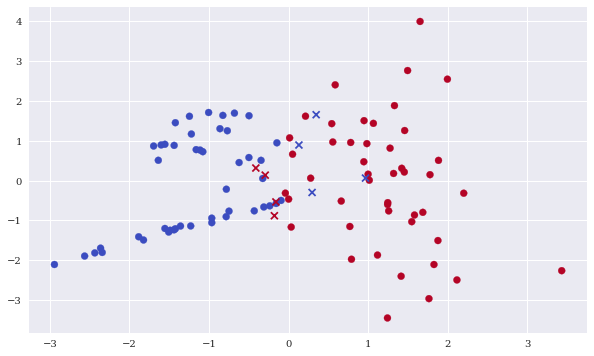

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x=Xc[:, 0], y=Xc[:, 1], c=y[y == pred], marker='o', cmap='coolwarm')
plt.scatter(x=Xf[:, 0], y=Xf[:, 1], c=y[y != pred], marker='x', cmap='coolwarm');

#### Feature transforms

Deep neural networks 부분은 생략 (tensorflow 버전 오류)

In [ ]:
from sklearn import preprocessing

In [ ]:
X[:5]

array([[ 1.68762365, -0.79757726],
       [-0.4312405 , -0.76063089],
       [-1.43934486, -1.23632519],
       [ 1.11799425, -1.86821958],
       [ 0.05020412,  0.65899067]])

In [ ]:
Xs = preprocessing.StandardScaler().fit_transform(X)
Xs[:5]

array([[ 1.28814988, -0.54885303],
       [-0.33836772, -0.52155672],
       [-1.11222549, -0.87300391],
       [ 0.85088152, -1.33985312],
       [ 0.03120677,  0.52727234]])

In [ ]:
Xm = preprocessing.MinMaxScaler().fit_transform(X)
Xm[:5]

array([[0.72620338, 0.35629123],
       [0.39392563, 0.3612627 ],
       [0.2358359 , 0.29725366],
       [0.63687477, 0.21222646],
       [0.4694252 , 0.55228583]])

In [ ]:
Xn1 = preprocessing.Normalizer(norm='l1').transform(X)
Xn1[:5]

array([[ 0.6790693 , -0.3209307 ],
       [-0.36181798, -0.63818202],
       [-0.5379381 , -0.4620619 ],
       [ 0.37438519, -0.62561481],
       [ 0.07079031,  0.92920969]])

In [ ]:
Xn2 = preprocessing.Normalizer(norm='l2').transform(X)
Xn2[:5]

array([[ 0.90411541, -0.42728833],
       [-0.49319983, -0.86991604],
       [-0.75857884, -0.65158126],
       [ 0.51350334, -0.8580876 ],
       [ 0.07596323,  0.99711062]])

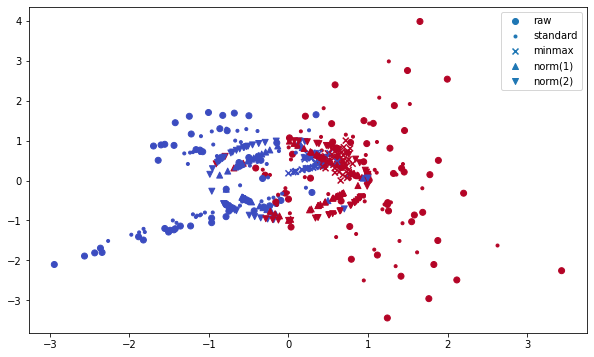

In [ ]:
plt.figure(figsize=(10, 6))
markers = ['o', '.', 'x', '^', 'v']
data_sets = [X, Xs, Xm, Xn1, Xn2]
labels = ['raw', 'standard', 'minmax', 'norm(1)', 'norm(2)']
for x, m, l in zip(data_sets, markers, labels):
    plt.scatter(x=x[:, 0], y=x[:, 1], c=y, 
                marker=m, cmap='coolwarm', label=l)
plt.legend();

In [ ]:
X[:5]

array([[ 1.68762365, -0.79757726],
       [-0.4312405 , -0.76063089],
       [-1.43934486, -1.23632519],
       [ 1.11799425, -1.86821958],
       [ 0.05020412,  0.65899067]])

In [ ]:
Xb = preprocessing.Binarizer().fit_transform(X)
Xb[:5]

array([[1., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 1.]])

In [ ]:
2 ** 3

8

In [ ]:
Xd = np.digitize(X, bins=[-1, 0, 1])
Xd[:5]

array([[3, 1],
       [1, 1],
       [0, 0],
       [3, 0],
       [2, 2]])

In [ ]:
4 ** 2

16

#### Train-test splits: Support vector machines

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=0)

In [ ]:
model = SVC(C=1, kernel='linear')

In [ ]:
model.fit(train_x, train_y)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pred_train = model.predict(train_x)

In [ ]:
accuracy_score(train_y, pred_train)

0.9402985074626866

In [ ]:
pred_test = model.predict(test_x)

In [ ]:
test_y == pred_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False,  True,  True,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True])

In [ ]:
accuracy_score(test_y, pred_test)

0.7878787878787878

In [ ]:
test_c = test_x[test_y == pred_test]
test_f = test_x[test_y != pred_test]

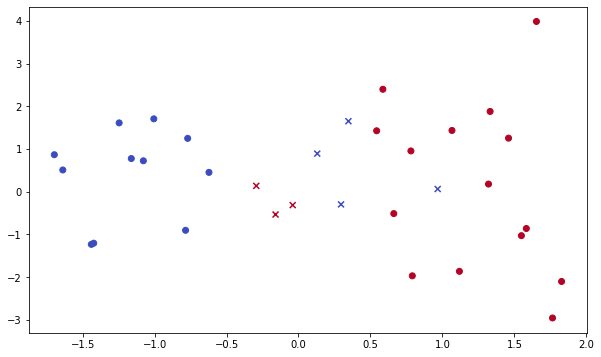

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x=test_c[:, 0], y=test_c[:, 1], c=test_y[test_y == pred_test], 
            marker='o', cmap='coolwarm')
plt.scatter(x=test_f[:, 0], y=test_f[:, 1], c=test_y[test_y != pred_test], 
            marker='x', cmap='coolwarm');

In [ ]:
bins = np.linspace(-4.5, 4.5, 50)

In [ ]:
Xd = np.digitize(X, bins=bins)

In [ ]:
Xd[:5]

array([[34, 21],
       [23, 21],
       [17, 18],
       [31, 15],
       [25, 29]])

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(Xd, y, test_size=0.33, random_state=0)

In [ ]:
print('{:>8s} | {:8s}'.format('kernel', 'accuracy'))
print(20 * '-')
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    model = SVC(C=1, kernel=kernel, gamma='auto')
    model.fit(train_x, train_y)
    acc = accuracy_score(test_y, model.predict(test_x))
    print('{:>8s} | {:8.3f}'.format(kernel, acc))

  kernel | accuracy
--------------------
  linear |    0.848
    poly |    0.758
     rbf |    0.788
 sigmoid |    0.455
